### Workshop - 1: K- Means Clustering

This notebook will walk through some of the basics of K-Means Clustering.

### Author: SUNEEL KUMAR

In [326]:
# Importing labraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.cluster import KMeans
import warnings
from sklearn.preprocessing import Normalizer
warnings.filterwarnings("ignore")

In [171]:
#Creating Data frame
df=pd.read_csv("C:\\Users\\GUDO JI\\Downloads\\Iris.csv") 
df.head(5)  

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [172]:
#info dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


<Axes: >

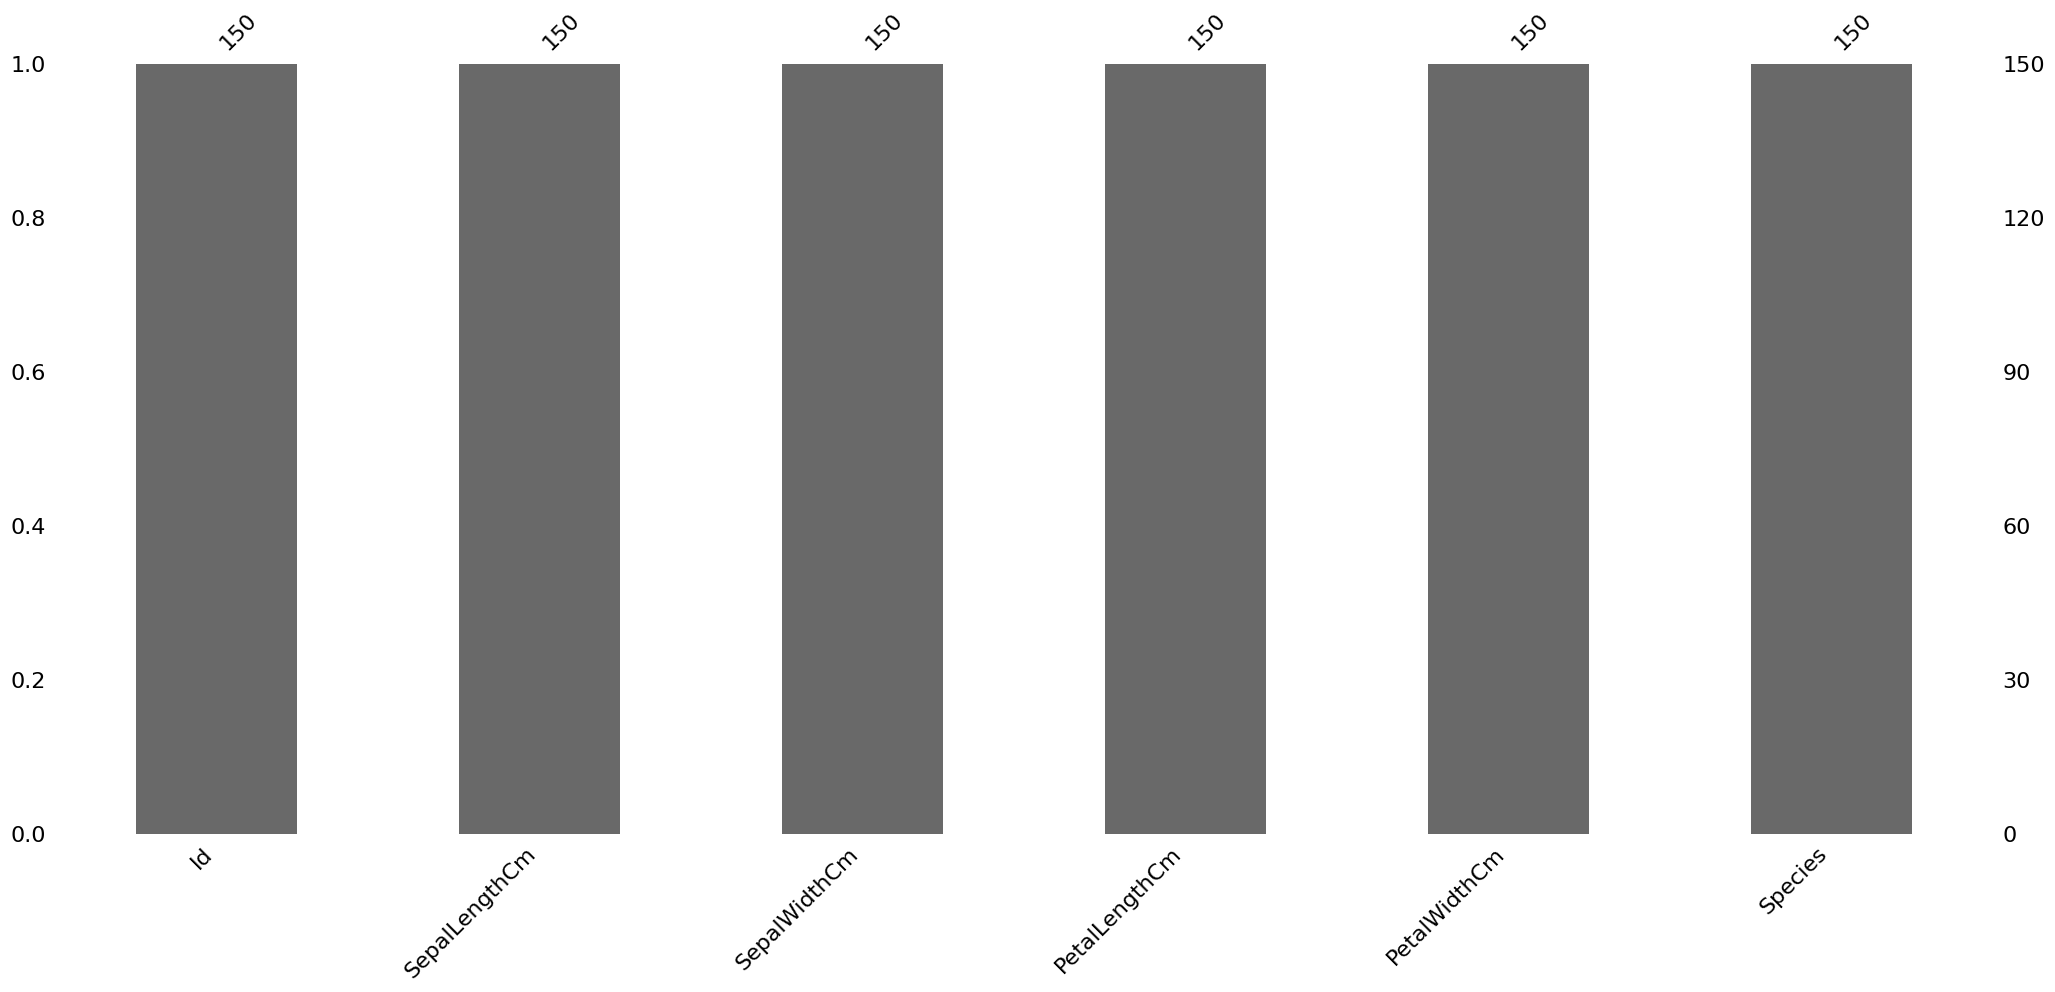

In [173]:
#visualization
msno.bar(df)

In [174]:
#defining columns
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [175]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


<Axes: >

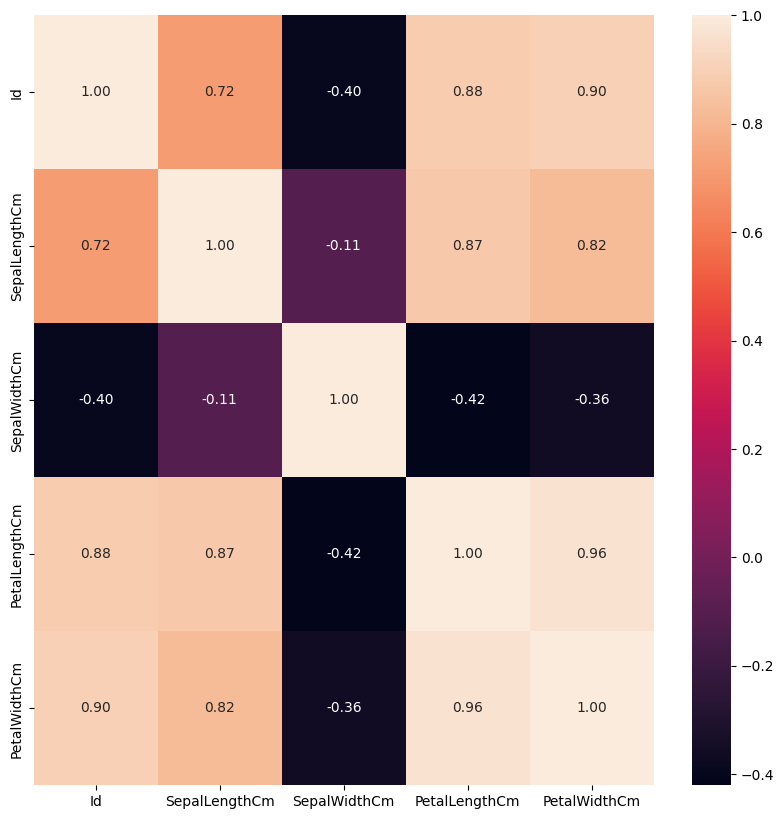

In [176]:
#correlation
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True, fmt='.2f')

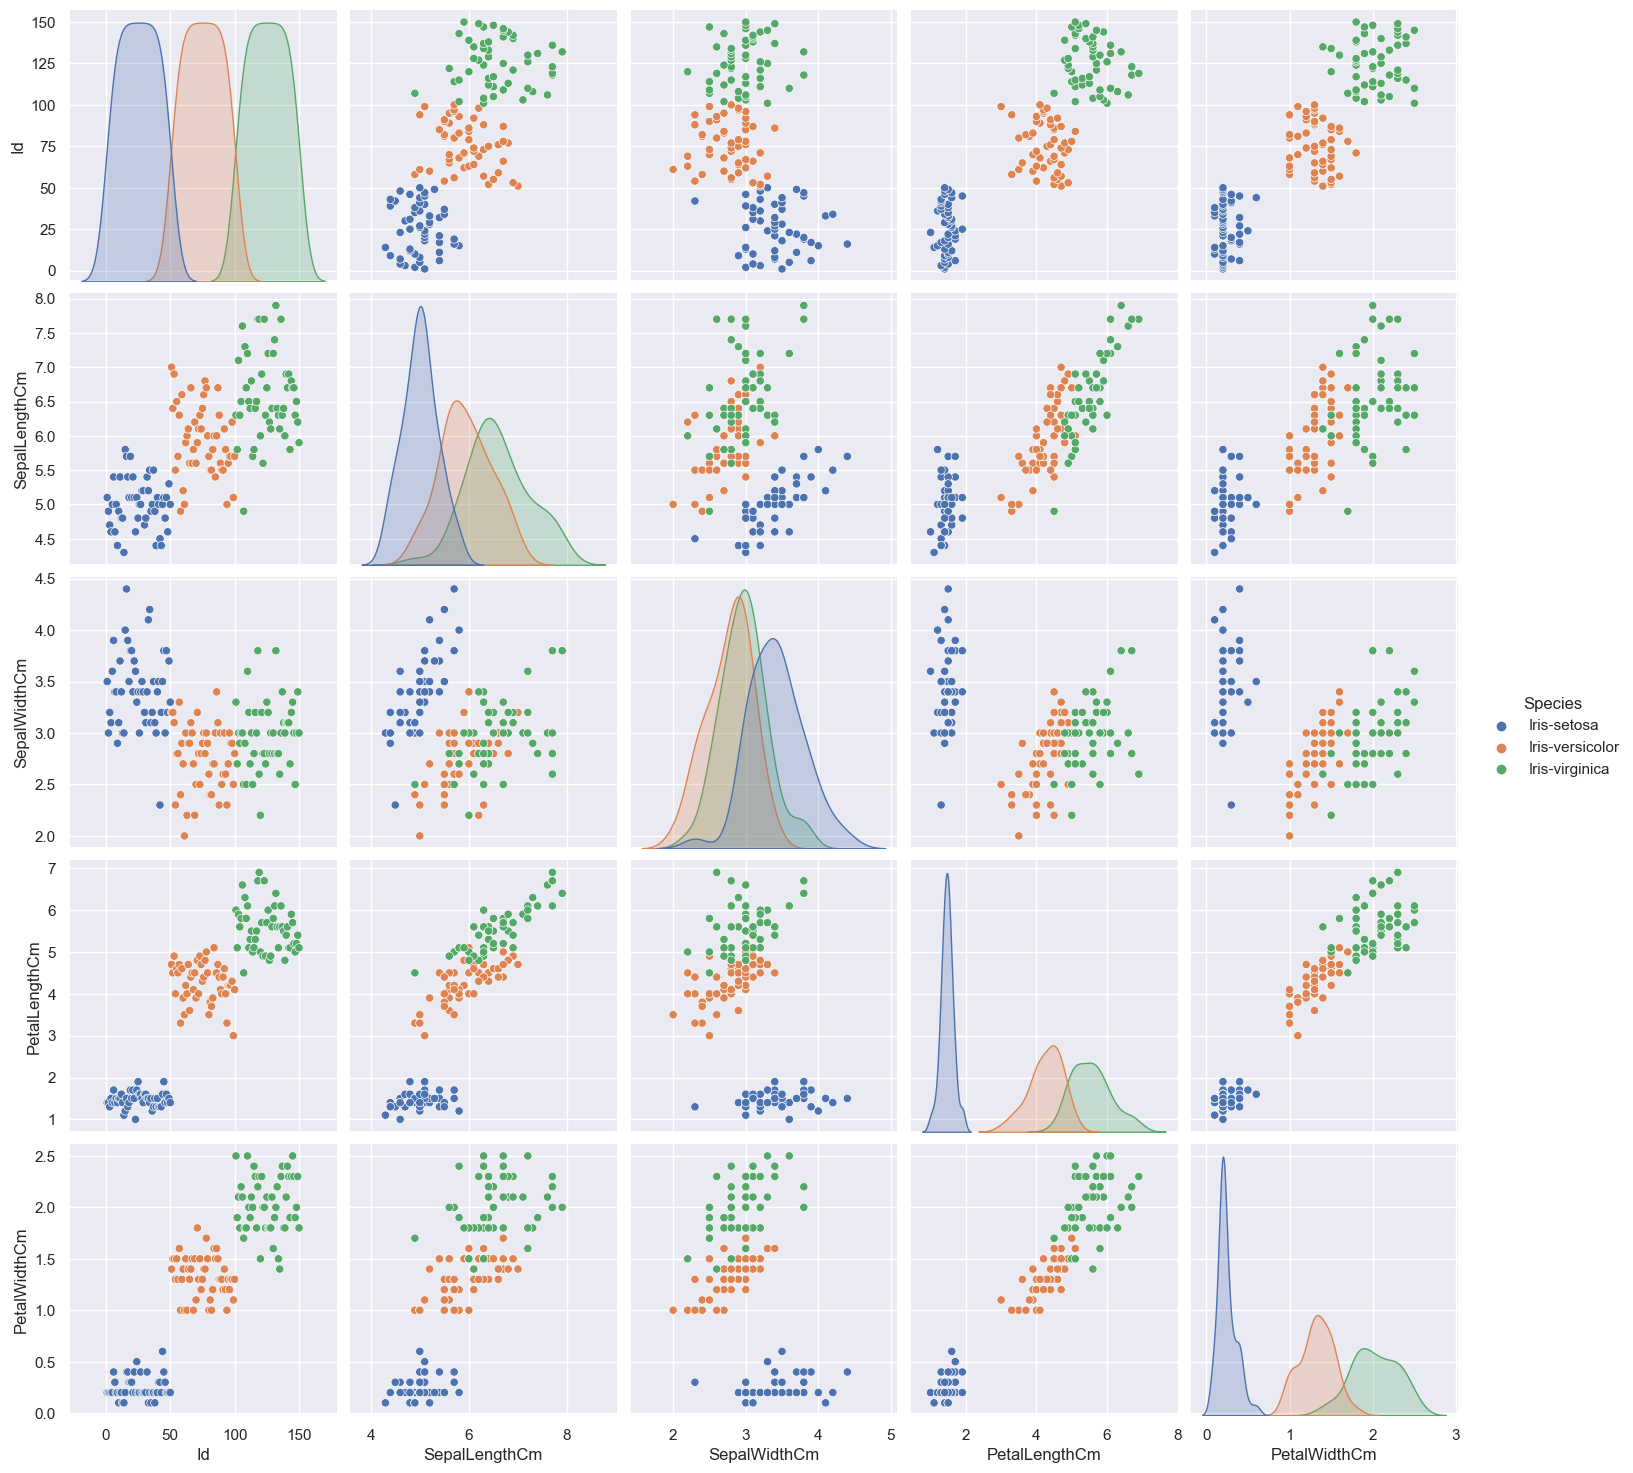

In [221]:
sns.pairplot(data=df, hue="Species", size=3, diag_kind="kde") #HISTOGRAM BY DEFAULT

In [249]:
#lets see how many speices we have;
df["Species"].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

DETERMINE THE OPTIMUM OF CLUSTER  FOR KMEANS

In [285]:
x=df.iloc[:,[0,1,2,3]].values
wcs=[]
for i in range(1,11):
     kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)

In [286]:
kmeans.fit(x)

KMeans(n_clusters=10, n_init=10, random_state=0)

In [287]:
wcs.append(kmeans.inertia_)

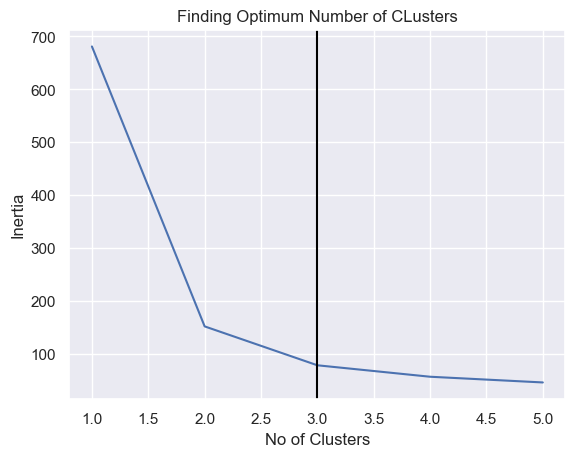

In [292]:
dff=df.iloc[:,[1,2,3,4]] #Copying 4 measuring columns of our dataset in a new dataset
clusters=range(1,6) #Setting range of clusters to be checked to decide the best choice
inertia=[] #Declaring an empty list of "Inertia"
for k in clusters: #Looping through each value of "clusters"
  model=KMeans(n_clusters=k) #Initiating the model by using KMeans algorithm
  model.fit(dff) #Fitting our model to newly created dataset "iris1"
  inertia.append(model.inertia_) #Calculating the inertia for that model and appending in the list of "inertia"
plt.plot(clusters,inertia) #Plotting "inerta" vs "clusters" to apply the rule of elbow
plt.xlabel("No of Clusters") #Setting xlabel
plt.ylabel("Inertia") #Setting ylabel
plt.title("Finding Optimum Number of CLusters") #Setting title
plt.axvline(x=3.0,color='Black') #Highlighting the no of cluster that is optimum in our case
plt.show() 

In [325]:
dff_arr=dff.to_numpy() #converting the df dataset to numpy 2-d
model=KMeans(n_clusters=3) #initaiting the model using kmeansalgorithm
model.fit(dff_arr) #fiting model to created array
labels=model.predict(dff_arr) #predict our model
species=df["Species"] #initaiting speices
dx=pd.DataFrame({'labels':labels,'species':species}) #creating  another dataset 
ct=pd.crosstab(dx['labels'],dx['species']) #creating tabulation
print(ct) # displaying

species  Iris-setosa  Iris-versicolor  Iris-virginica
labels                                               
0                  0                2              36
1                  0               48              14
2                 50                0               0


In [340]:
#we can normalize our dataset
normalize=Normalizer() #initaitinh normalizer
kmeans=KMeans(n_clusters=3)
from sklearn.pipeline import make_pipeline
pipeline=make_pipeline(normalize,kmeans) #pipingit with kmeans
pipeline.fit(dff_arr)
labels=pipeline.predict(dff_arr)
species=df["Species"]
dx1=pd.DataFrame({'labels':labels,'species':species})
ct=pd.crosstab(dx1['labels'],dx1['species'])
print(ct) #displying


species  Iris-setosa  Iris-versicolor  Iris-virginica
labels                                               
0                  0               45               0
1                 50                0               0
2                  0                5              50


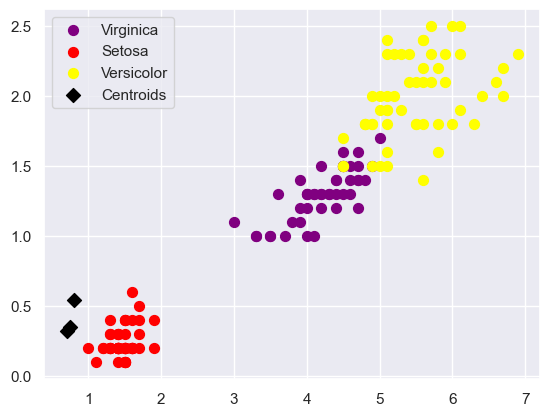

In [342]:
#Now we are visualizing the clusters for last two columns of 2-D array "iris1_arr"

label1_x=dff_arr[labels==0,2] #Created an array having samples of label0 for column 3
label1_y=dff_arr[labels==0,3] #Created an array having samples of label0 for column 4
label2_x=dff_arr[labels==1,2] #Created an array having samples of label1 for column 3
label2_y=dff_arr[labels==1,3] #Created an array having samples of label1 for column 4
label3_x=dff_arr[labels==2,2] #Created an array having samples of label2 for column 3
label3_y=dff_arr[labels==2,3] #Created an array having samples of label2 for column 4
plt.scatter(label1_x,label1_y,color='purple',label='Virginica',s=50) #Scatter plot of label1 for column4 vs column3
plt.scatter(label2_x,label2_y,color='red',label='Setosa',s=50) #Scatter plot of label2 for column4 vs column3
plt.scatter(label3_x,label3_y,color='yellow',label='Versicolor',s=50) #Scatter plot of label3 for column4 vs column3
centroids=kmeans.cluster_centers_ #Calculating mean for samples of each cluster, called as centroids
centroids_x=centroids[:,0] #Storing the absicca of the centroids
centroids_y=centroids[:,1] #Storing the ordinates of the centroids
plt.scatter(centroids_x,centroids_y,marker='D',s=50,c="Black",label='Centroids') #Scatter plot of centroids
plt.legend() #Adding a legend to our plot
plt.show() #Displaying the plot

Thank you!